In [6]:
import turicreate as tc
import os

In [3]:
data = tc.image_analysis.load_images('dataset', with_path=True)

In [7]:
data

path,image
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 181 Width: 220
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 157 Width: 219
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 171 Width: 220
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 162 Width: 215
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 140 Width: 208
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 131 Width: 199
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 137 Width: 203
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 126 Width: 204
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 125 Width: 185
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 127 Width: 209


In [8]:
data['sneaker_name'] = data['path'].apply(lambda path: os.path.basename(os.path.dirname(path)))

In [9]:
data

path,image,sneaker_name
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 181 Width: 220,jordan_eleven
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 157 Width: 219,jordan_eleven
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 171 Width: 220,jordan_eleven
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 162 Width: 215,jordan_eleven
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 140 Width: 208,jordan_eleven
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 131 Width: 199,jordan_eleven
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 137 Width: 203,jordan_eleven
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 126 Width: 204,jordan_eleven
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 125 Width: 185,jordan_eleven
/Users/GaelGil/Desktop/GitRepos/notebooks/buil ...,Height: 127 Width: 209,jordan_eleven


,path,image,sneaker_name
0,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.04 PM.png,,jordan_eleven
1,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.10 PM.png,,jordan_eleven
2,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.15 PM.png,,jordan_eleven
3,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.23 PM.png,,jordan_eleven
4,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.29 PM.png,,jordan_eleven
5,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.35 PM.png,,jordan_eleven
6,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.41 PM.png,,jordan_eleven
7,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.46 PM.png,,jordan_eleven
8,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.52 PM.png,,jordan_eleven
9,/Users/GaelGil/Desktop/GitRepos/notebooks/build_opencv/turicreateExample/demo/dataset/jordan_eleven/Screen Shot 2020-08-01 at 1.04.58 PM.png,,jordan_eleven

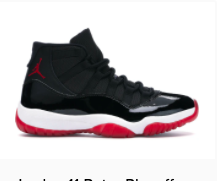
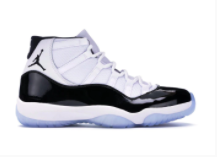
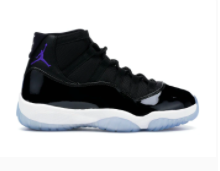
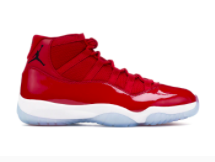
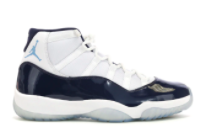
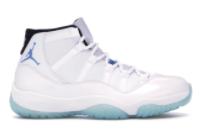
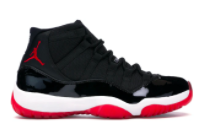
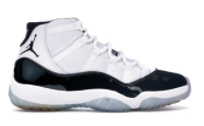
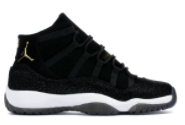
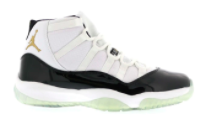
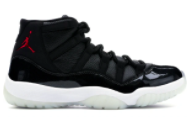
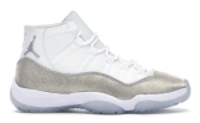
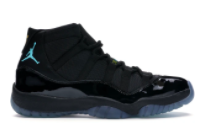
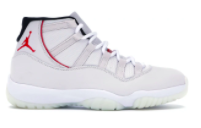
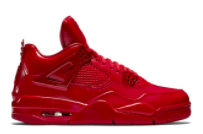
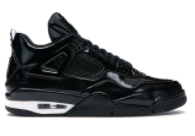
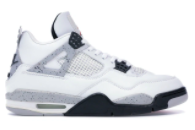
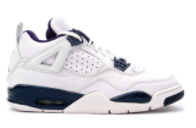
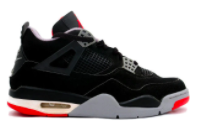
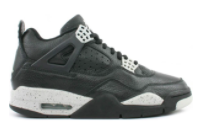
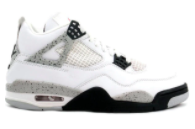
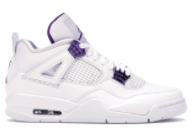
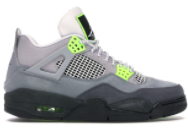
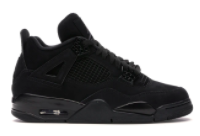
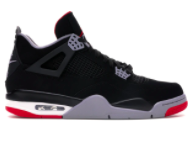
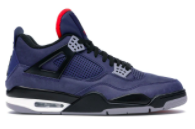
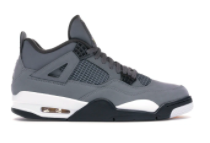
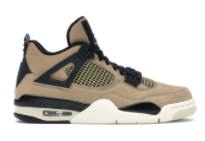
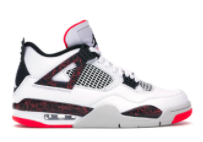
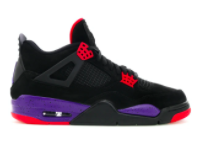
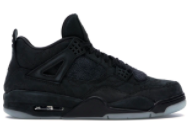
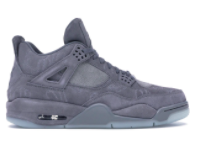
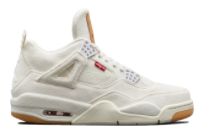
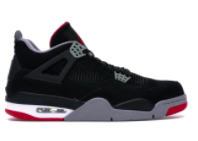
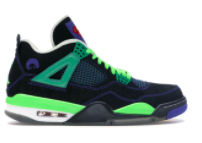
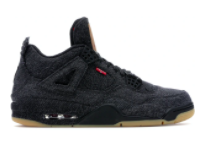
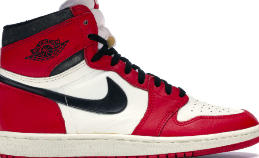
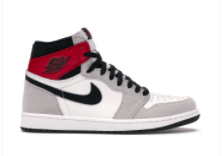
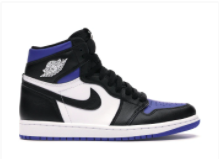
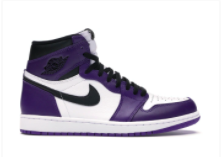
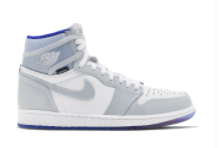
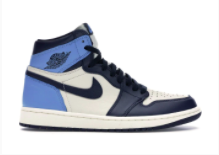
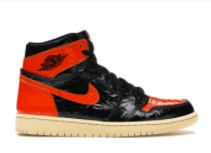
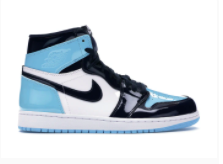
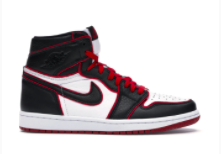
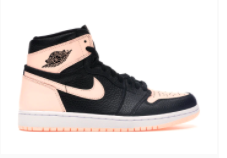
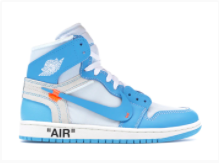
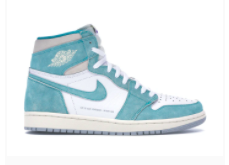
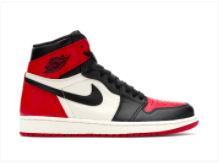
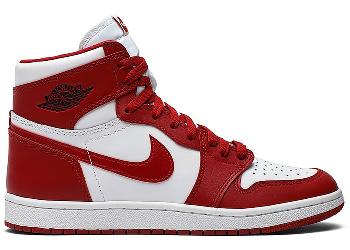
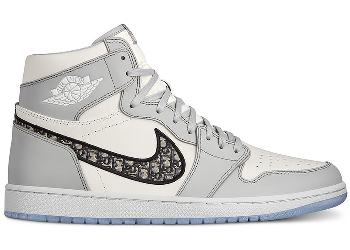
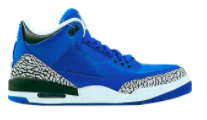
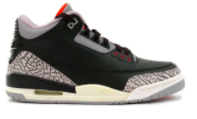
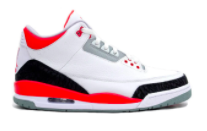
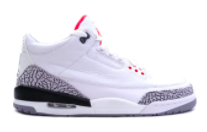
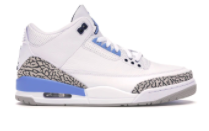
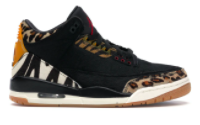
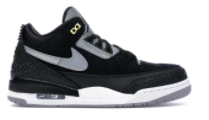
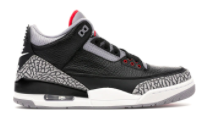
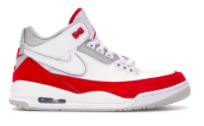
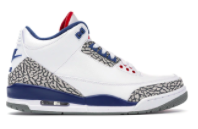
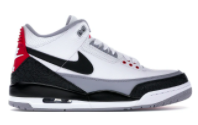
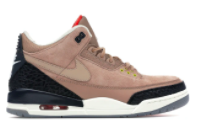
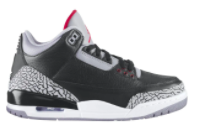
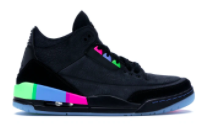
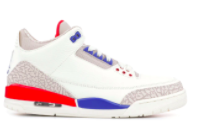
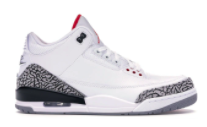
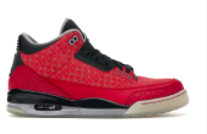

In [10]:
data.explore()

In [ ]:
data =  tc.SFrame('turi.sframe')

# Make a train-test split
train_data, test_data = data.random_split(0.8)

# Create the model
model = tc.image_classifier.create(train_data, target='sneaker_name')

# Save predictions to an SArray
predictions = model.predict(test_data)

# Evaluate the model and print the results
metrics = model.evaluate(test_data)
print(metrics['accuracy'])

# Save the model for later use in Turi Create
model.save('sneaker.model')


# new_cats_dogs['predictions'] = model.predict(new_cats_dogs)
new_shoes = tc.image_analysis.load_images('dataset', with_path=True)

new_shoes['predictions'] = model.predict(new_shoes)